In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [7]:
data.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [8]:
data.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


<AxesSubplot:xlabel='smoker', ylabel='count'>

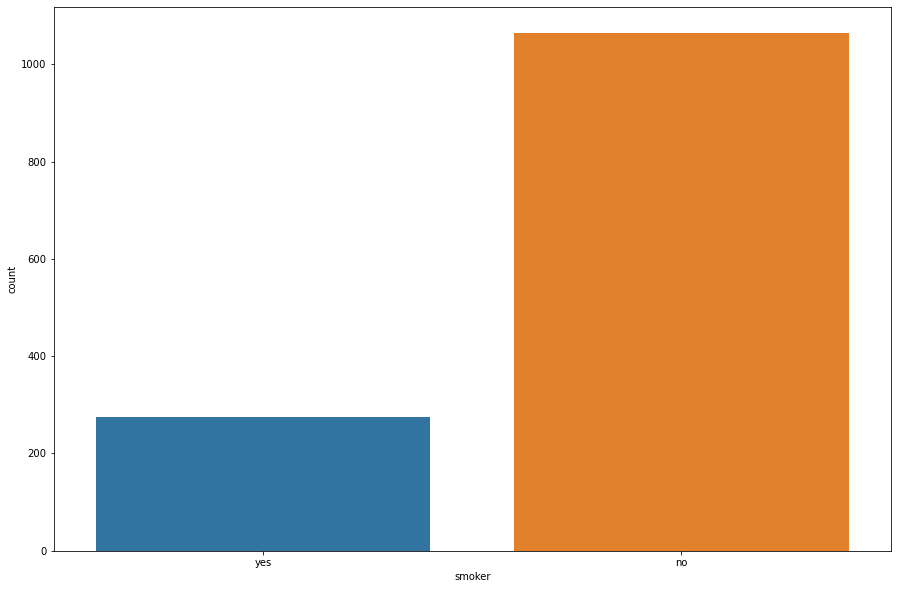

In [10]:
plt.figure(figsize =(15,10))
sns.countplot(x = 'smoker',data= data)

<AxesSubplot:xlabel='sex', ylabel='count'>

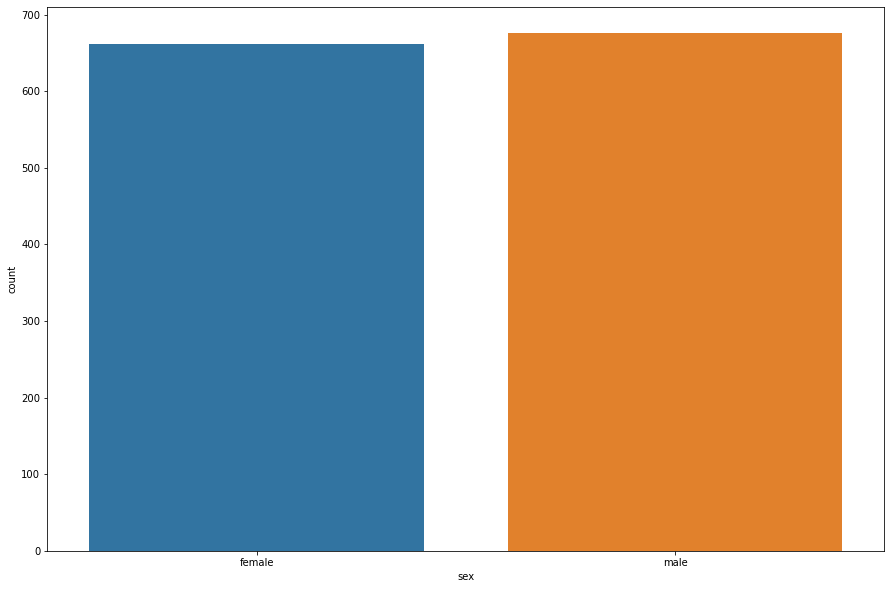

In [11]:
plt.figure(figsize =(15,10))
sns.countplot(x = 'sex',data= data)

<AxesSubplot:xlabel='region', ylabel='count'>

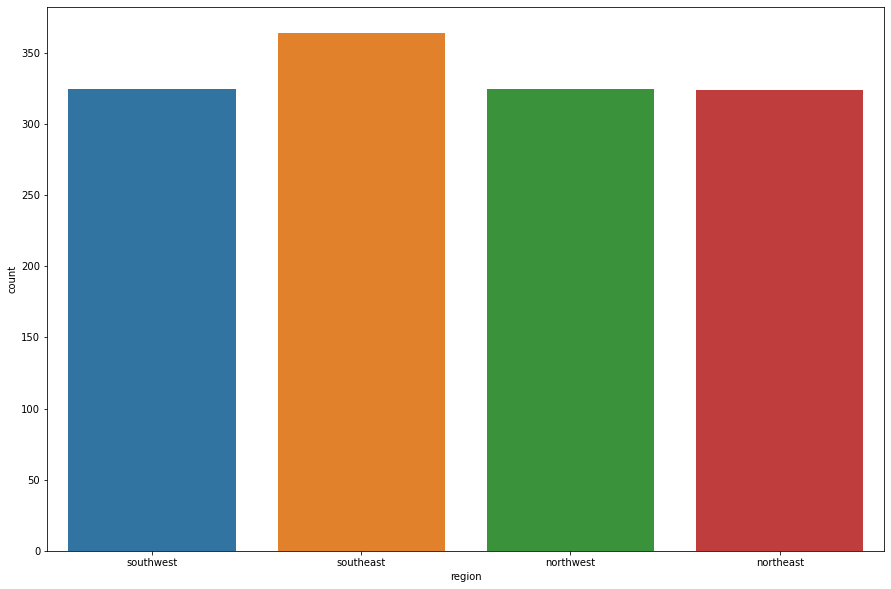

In [12]:
plt.figure(figsize =(15,10))
sns.countplot(x = 'region',data= data)

<AxesSubplot:>

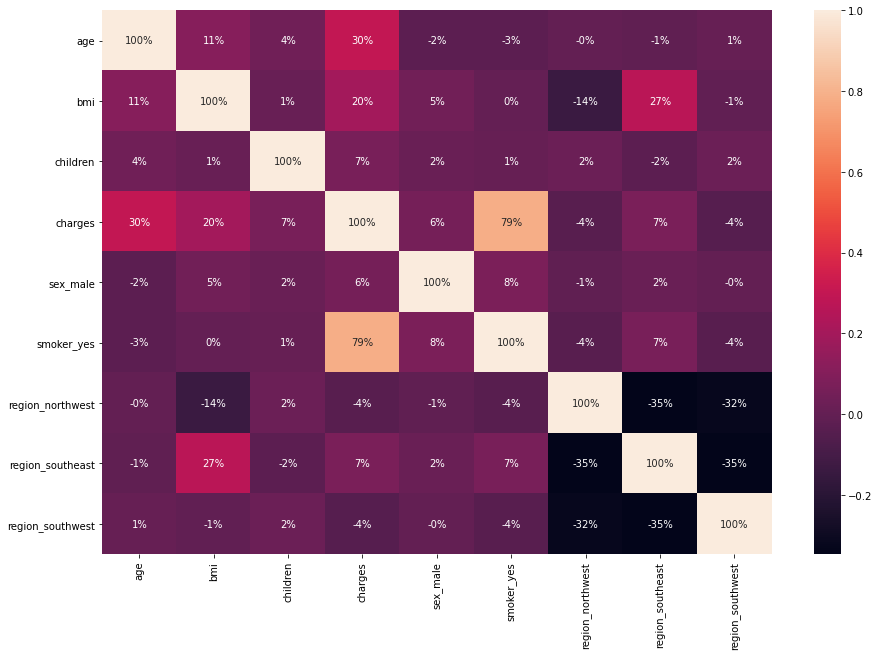

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot= True ,fmt ='.0%')

In [14]:
data = pd.get_dummies(data = data,drop_first = True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   uint8  
 5   smoker_yes        1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.5 KB


In [27]:
x = data.drop(columns =['charges'])
y =data['charges']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [26]:
data.isnull().any()

age                 False
bmi                 False
children            False
charges             False
sex_male            False
smoker_yes          False
region_northwest    False
region_southeast    False
region_southwest    False
dtype: bool

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
rfg.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
predict =rfg.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score , confusion_matrix ,r2_score
r2_score(y_test,predict)

0.855598018741951

In [44]:
from sklearn.linear_model import LinearRegression
lg= LinearRegression()
lg.fit(x_train,y_train)
lg_predict = lg.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
r2_score(y_test,lg_predict)

0.769611805436901